# Storing API keys and Other Secrets

## The Problem

Here's a program that uses the Python [tweepy](https://github.com/tweepy/tweepy) package to search Twitter for tweets.

In [24]:
import tweepy

consumer_key = 'KUcqLzhPjO7h5KIOqlBVlJEV2'
consumer_secret = '4EDjaB8zxBy55GoNk5eVGOjbdzhl6wSY6vTnVfAkBCWg0JZZ9E'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

for tweet in api.search('olin', lang='EN'):
    print tweet.text

Olin is looking for a #Summer #Co-op in #Plaquemine, apply now! #jobs https://t.co/ii8az2lPr1
Olin Chlor Alkali is hiring! #Summer #Co-op in #Plaquemine, apply now! #jobs https://t.co/1abk81NjsD
Marketing Manager, Olin-Fudan EMBA Program: The Olin-Fudan EMBA program is one of the most respec... https://t.co/pKEcpPOvLL #jobs #china
Apply now to work for Olin Chlor Alkali as #Maintenance #Instrument Technician in #Plaquemine #jobs https://t.co/946vTd3QNz


### Secrets

Note the `consumer_key` and `consumer_secret`. These are necessary to use the Twitter API.
(Many other web service APIs work similarly.)

I created these keys by:

1. Visiting https://apps.twitter.com
2. Creating a new app (“Olin SoftDes Example”)
3. Clicking “Keys and Access Tokens”. See the screenshot below.

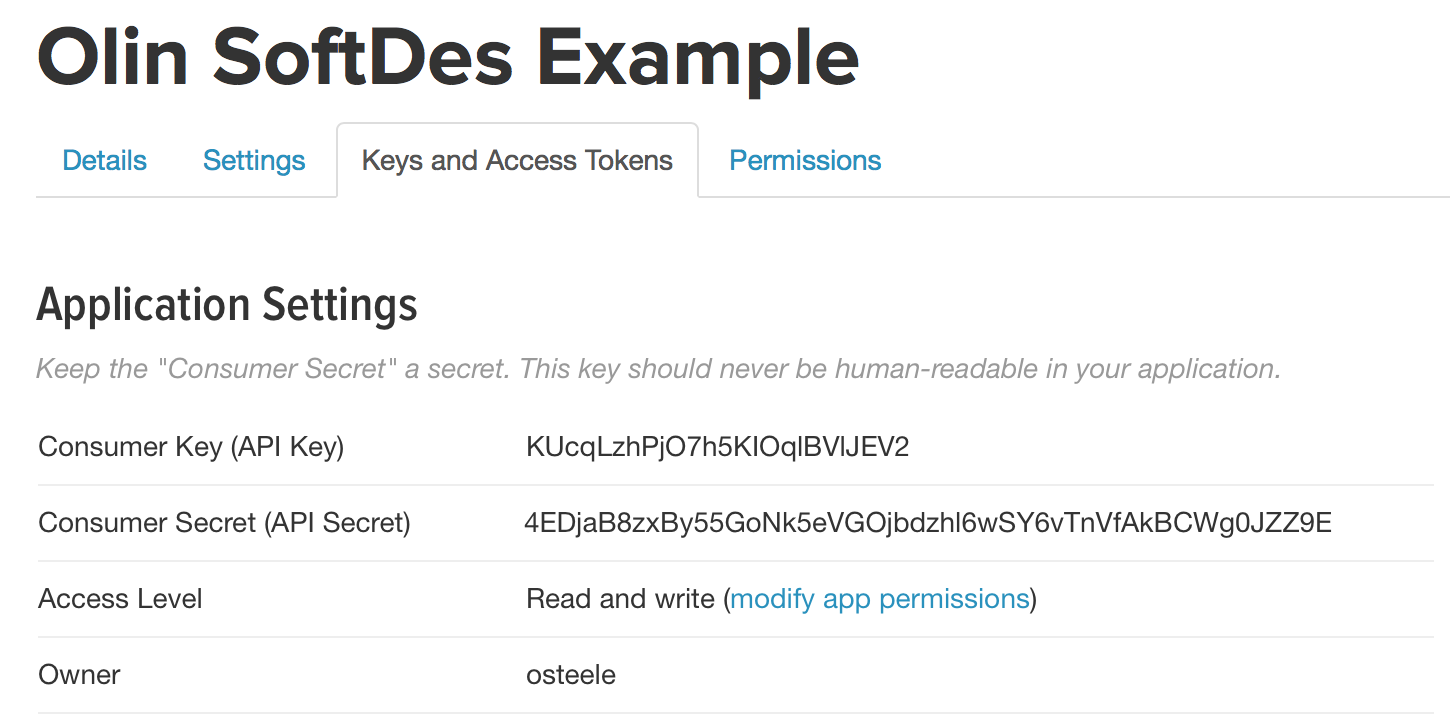

In [22]:
# You can ignore the next two lines. They're just to get the screenshot to show up in the notebook.
from IPython.core.display import Image
Image(filename='images/twitter_api_keys.png')

### Publishing your secrets

Now add the file with this code to your repository, and push it to GitHub.

What could go wrong?

I didn't actually publish this code to GitHub, but the screenshot below shows one way to discover the API keys of users who did.

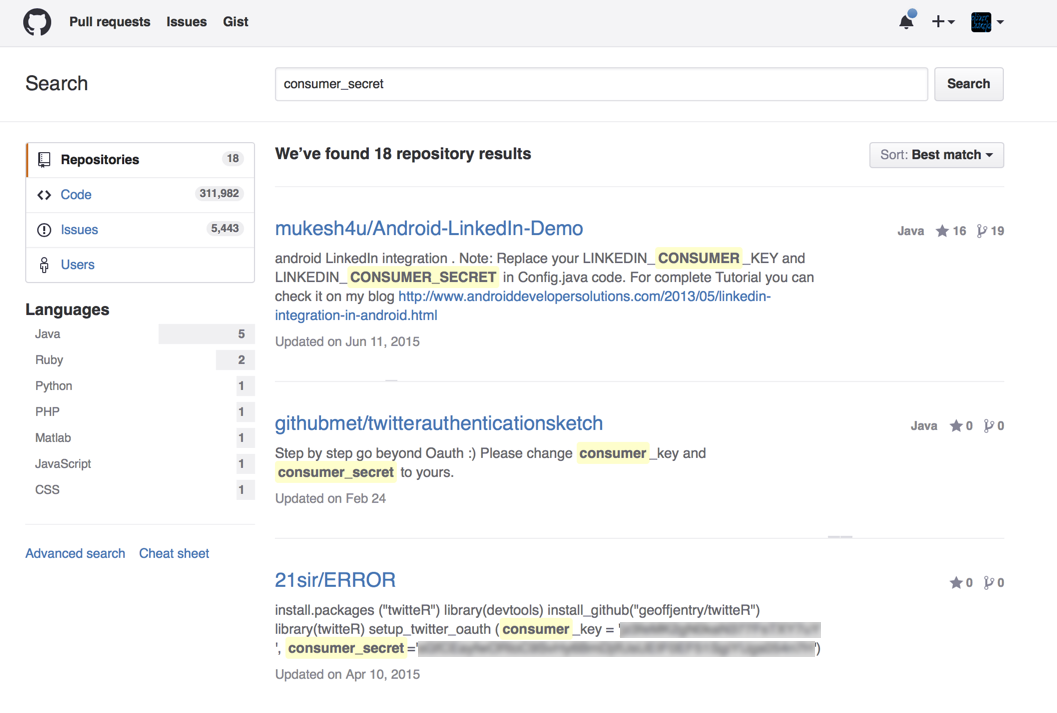

In [25]:
Image(filename='images/github_consumer_secret.png')

There's (at least) three problems with publishing your secrets to GitHub like this:

1. People will start using your API key, and this will cut into your API limits → your application stops working.
2. You can't (easily) share your code with someone who uses a different API key. They have to edit your code; when you publish a new version, they have to remember to edit it again.
3. An attacker can use your API code to spam Twitter, and then one or more of: you get blamed for it; your application key is revoked (→ your application stops working); your application is revoked (→ your application stops working, and it's harder to fix it); your account is suspended (and it's even harder to fix it).
4. It looks unprofessional. (Because of reasons ##1-3.)

## Solution #1: (Non-source-controlled) Configuration File

The simplest solution is to move your secrets into another file (say, `config.py`), that isn't checked into git.

1\. Create a file `config.py`:

```
consumer_key = 'KUcqLzhPjO7h5KIOqlBVlJEV2'
consumer_secret = '4EDjaB8zxBy55GoNk5eVGOjbdzhl6wSY6vTnVfAkBCWg0JZZ9E'
```

2\. Create a file `.gitignore`, with a single line that tells `git` not add `config.py` to the repository:

```
config.py
```

3\. Modify your Python code to import `consumer_key` and `consumer_secret`, instead of defining them.

```
import tweepy
from config import consumer_key, consumer_secret # This line replaces the lines that set the variables.

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)
for tweet in api.search('olin', lang='EN'):
    print tweet.text
```

4\. Modify your project's README to document that the user needs to create a file `config.py`. Some projects create a file *e.g.* `config.py.template`:

```
consumer_key = ...
consumer_secret = ...
```

5\. Distribute `config.py` to your teammates by [sneakernet](https://en.wikipedia.org/wiki/Sneakernet) or another secure channel. (For this class, email and other messaging apps work too. In a higher-security context, you'd only want to use applications with end-to-end encryption, that let you delete the message. In an even higher-security context, everyone would use their own secrets anyway.)

6\. If you already published the API key to GitHub (or another public location), re-generate the API keys.

For example, by publishing this notebook, I published my (previous) Twitter API keys. Now they're different.

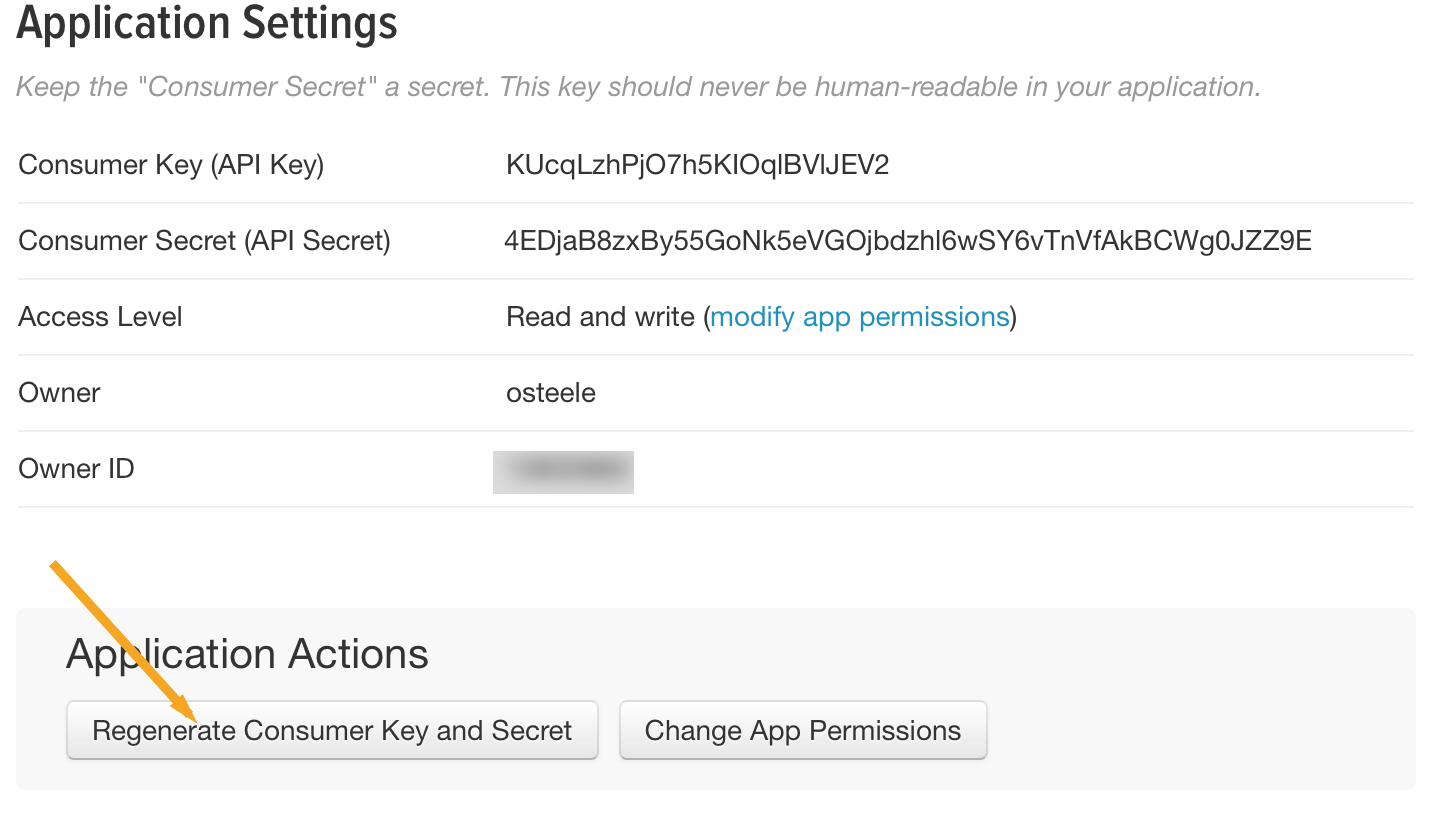

In [95]:
Image(filename='images/twitter_api_keys_reset.png')

## Alternative Solution #1: Environment Variables

A common alternative solution is to place the secret in an [environment variable](https://en.wikipedia.org/wiki/Environment_variable),
and modify the code to read from the environment variable, instead of from another file:

```
import os
import tweepy

consumer_key = os.environ['TWITTER_CONSUMER_KEY']
consumer_secret = os.environ['TWITTER_CONSUMER_SECRET']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)
for tweet in api.search('olin', lang='EN'):
    print tweet.text
```

Then set the environment variables before you run the program:

```
$ export TWITTER_CONSUMER_KEY='KUcqLzhPjO7h5KIOqlBVlJEV2'
$ export TWITTER_CONSUMER_SECRET='4EDjaB8zxBy55GoNk5eVGOjbdzhl6wSY6vTnVfAkBCWg0JZZ9E'
$ python do_stuff_with_twitter.py
```

Setting the environment variables is a bother to remember each time your create a new terminal window, so it's common to place those lines in your `.bashrc` instead.

There are also packages such as http://direnv.net, that let you place environment variables in a file in your project directory.
This is useful if you're working on several projects, and want to keep track of which environment variables go with which project.

Placing secrets and other configuration information in environment variables is especially prevalant in server software development, where different API keys are used (1) for development, (2) a staging environment, and (3) the production environment. 

See [The Twelve-Factor App: Config](http://12factor.net/config) for more on this.

## Alternative Solution #2: Encrypted File

Another technique is to place secrets in a configuration file that *is* checked into the repository, but is *encrypted*.

[git-secret](https://sobolevn.github.io/git-secret/) and [blackbox](https://github.com/StackExchange/blackbox) are libraries that do this; [transparent git encryption](https://gist.github.com/shadowhand/873637/d098b2adccb221f8991e8b3044f1dc0a15903f57) describes how to do this using `git` itself.

## Where'd this `tweepy` package come from, anyway?

I started to use the [Pattern](http://www.clips.ua.ac.be/pages/pattern-web#twitter) module as an example, since we used it in [Homework 5](https://sites.google.com/site/sd16spring/home/homeworks/homework-5) and [Mini-Project 3](https://sites.google.com/site/sd16spring/home/assignments-and-mini-projects/text-mining):

In [ ]:
from pattern.web import Google, Twitter
engine = Twitter()
print engine.search('olin', size=5)

Unfortunately, Pattern uses its own Twitter API key if you don't supply one.

This muddies the waters, so I looked for a package that required an API key.

Here was my evaluation process:

* Google for `python twitter API` leads to <https://github.com/bear/python-twitter>. But I wasn't sure how popular this was, compared to other libraries. (I figured a popular library had a better chance of actually working.)

* Google also lead to [https://dev.twitter.com/overview/api/twitter-libraries](Twitter's own list of libraries). Often a service provider such as Twitter has an *official* or *recommended* library. Twitter doesn't, but I decided to use its list of *known* libraries as a starting point.

* The linked libraries had 3296 (tweepy), 12 (twitter-python-ads-sdk), 1195 (python-twitter), 64 (tweet-pony), 1559 (twitter), 7 (twitter-gobject), 148 (TwitterSearch), 1143 (twython), 255 (TwitterAPI), and 174 (birdy) GitHub stars:

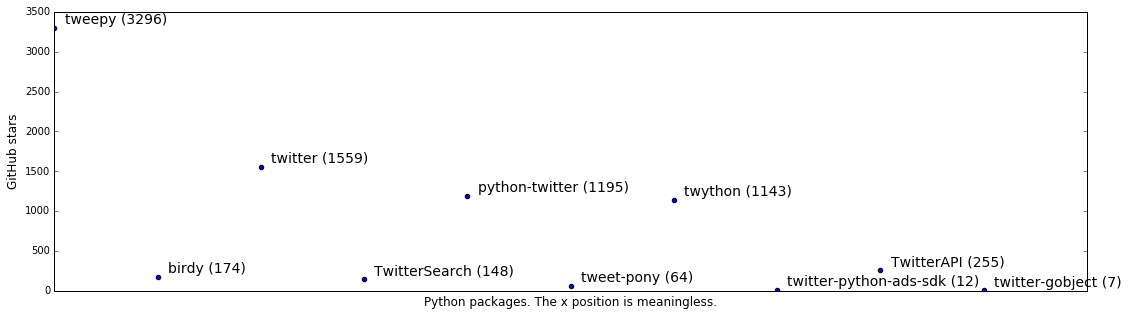

In [94]:
%matplotlib inline
import re
import matplotlib
import matplotlib.pyplot as plt

stars_s = '3296 (tweepy), 12 (twitter-python-ads-sdk), 1195 (python-twitter), 64 (tweet-pony), 1559 (twitter), 7 (twitter-gobject), 148 (TwitterSearch), 1143 (twython), 255 (TwitterAPI), 174 (birdy)'
entries = [(name, int(stars)) for stars, name in re.findall(r'(\d+) \((.+?)\)', stars_s)]
# interleave low and high entries to make room for text
entries = sorted(entries, key=lambda t:-t[1])
mid = len(entries) // 2
entries = [entries for pair in zip(entries[:mid], entries[mid:]) for entries in pair]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 5)
ax.scatter(range(len(entries)), [stars for _, stars in entries])
ax.set_xticks([])
ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_xlabel('Python packages. The x position is meaningless.', fontsize=12)
ax.set_ylabel('GitHub stars', fontsize=12)
for i, entry in enumerate(entries):
    ax.annotate('%s (%d)' % entry, (i + 0.1, entry[1] + 50), fontsize=14)

I planned to work my way through the most highly-ranked libraries – `tweepy`, `twitter`, and `python-twitter` – but stopped at `tweepy`, because it had good documentation, and it worked.